Loading the different llm datasets

In [1]:
# import statements
import os
import numpy as np
import pandas as pd

In [2]:
# reading all the LLM datafiles into dataframes

df_gpt35_0613 = pd.read_csv('shared_responses_llm/shared_responses_gpt-3.5-turbo-0613.csv')
df_gpt40 = pd.read_csv('shared_responses_llm/shared_responses_gpt-4-0613.csv')
df_llama = pd.read_csv('shared_responses_llm/shared_responses_llama-2-7b-chat.csv')
df_palm2 = pd.read_csv('shared_responses_llm/shared_responses_palm2.csv')
df_claude35 = pd.read_csv('shared_responses_llm/shared_responses_claude-3-5-sonnet-20241022.csv')
df_gemini_15 = pd.read_csv('shared_responses_llm/shared_responses_gemini-1.5-pro-001.csv')
df_gemini_pro = pd.read_csv('shared_responses_llm/shared_responses_gemini-pro.csv')
df_gemma_2b = pd.read_csv('shared_responses_llm/shared_responses_gemma-2b-it.csv')
df_c4ai = pd.read_csv('shared_responses_llm/shared_responses_c4ai-command-r-plus-4bit.csv')
df_mistral = pd.read_csv('shared_responses_llm/shared_responses_Mistral-7B-INstruct-v02.csv')
df_phi = pd.read_csv('shared_responses_llm/shared_responses_Phi-3.5-mini-instruct.csv')
df_vicuna_13b = pd.read_csv('shared_responses_llm/shared_responses_vicuna-13b-v1.5.csv')
df_vicuna_7b = pd.read_csv('shared_responses_llm/shared_responses_vicuna-7b-v1.5.csv')
df_meta = pd.read_csv('shared_responses_llm/shared_responses_Meta-Llama-3-70B-Instruct.csv')
df_gpt35_1106 = pd.read_csv('shared_responses_llm/shared_responses_gpt-3.5-turbo-1106.csv')
df_gemma_7b = pd.read_csv('shared_responses_llm/shared_responses_gemma-7b-it.csv')
df_claud_haiku = pd.read_csv('shared_responses_llm/shared_responses_claude-3-haiku-20240307.csv')
df_gpt35_0125 = pd.read_csv('shared_responses_llm/shared_responses_gpt-3.5-turbo-0125.csv')
df_gemma_9b = pd.read_csv('shared_responses_llm/shared_responses_gemma-2-9b-it.csv')
df_claude_3 = pd.read_csv('shared_responses_llm/shared_responses_claude-3-sonnet-20240229.csv')

In [6]:
columns = ['PedPed', 'Barrier', 'CrossingSignal', 'AttributeLevel', 
           'ScenarioTypeStrict', 'NumberOfCharacters', 'DiffNumberOFCharacters', 
           'Man', 'Woman', 'Pregnant', 'Stroller', 'OldMan', 'OldWoman', 
           'Boy', 'Girl', 'Homeless', 'LargeWoman', 'LargeMan', 'Criminal', 
           'MaleExecutive', 'FemaleExecutive', 'FemaleAthlete', 'MaleAthlete', 
           'FemaleDoctor', 'MaleDoctor', 'Dog', 'Cat']

In [16]:
# combining all the dataframes into one

df_all = pd.concat([df_gpt35_0613, df_gpt40, df_llama, df_palm2, df_claude35, df_gemini_15, df_gemini_pro, df_gemma_2b, df_c4ai, df_mistral, df_phi, df_vicuna_13b, df_vicuna_7b, df_meta, df_gpt35_1106, df_gemma_7b, df_claud_haiku, df_gpt35_0125, df_gemma_9b, df_claude_3])

In [17]:
df_all_sub = df_all[columns]
print(df_all_sub.shape)
print(df_all_sub.drop_duplicates().shape)   # checking all unique scenarios - 34394 unique scenarios

(1547132, 27)
(34394, 27)


In [18]:
df_all.shape

(1547132, 41)

In [19]:
df_all['ScenarioTypeStrict'].value_counts()

ScenarioTypeStrict
Age             267320
Species         264538
Utilitarian     259416
Fitness         255100
Gender          252220
Social Value    248538
Name: count, dtype: int64

In [20]:
# dropping responseID column
# df_all = df_all.drop(columns=['ResponseID'])

In [21]:
# df_all.duplicated().sum()

In [22]:
# a lot of duplicates cause of the same prompt being used for multiple models and the models just decide the same
# it is a characteristic of the data, one of which I can't do anything about

In [23]:
# Remove the '_1' and '_2' from the 'ResponseID' column, so each scenario has two rows with the same response ID (instead of one with _1 and one with _2)
df_all['ResponseID'] = df_all['ResponseID'].str.replace(r'_\d+$', '', regex=True)

In [24]:
df_all.reset_index(drop=True, inplace=True)

In [25]:
df_all.tail()

,ResponseID,ExtendedSessionID,UserID,ScenarioOrder,Intervention,PedPed,Barrier,CrossingSignal,AttributeLevel,ScenarioTypeStrict,...,LargeMan,Criminal,MaleExecutive,FemaleExecutive,FemaleAthlete,MaleAthlete,FemaleDoctor,MaleDoctor,Dog,Cat
1547127,res_00048078,chatbot_extended,chatbot,0,1,1,0,0,High,Social Value,...,0,0,0,0,0,0,0,1,0,0
1547128,res_00048079,chatbot_extended,chatbot,0,0,1,0,0,Hoomans,Species,...,0,1,0,0,0,0,0,0,0,0
1547129,res_00048079,chatbot_extended,chatbot,0,1,1,0,0,Pets,Species,...,0,0,0,0,0,0,0,0,2,3
1547130,res_00048080,chatbot_extended,chatbot,0,0,0,1,0,Young,Age,...,0,0,0,0,0,0,0,0,0,0
1547131,res_00048080,chatbot_extended,chatbot,0,1,0,0,1,Old,Age,...,0,0,0,0,0,0,0,0,0,0


In [26]:
# Define the starting point for the new ResponseID
starting_id = 0

# Get the total number of rows
num_rows = len(df_all)

# Create a new column where every two rows have the same ResponseID
df_all['ResponseID'] = [f'res_{starting_id + i // 2:08d}' for i in range(num_rows)]

In [27]:
df_all

,ResponseID,ExtendedSessionID,UserID,ScenarioOrder,Intervention,PedPed,Barrier,CrossingSignal,AttributeLevel,ScenarioTypeStrict,...,LargeMan,Criminal,MaleExecutive,FemaleExecutive,FemaleAthlete,MaleAthlete,FemaleDoctor,MaleDoctor,Dog,Cat
0,res_00000000,chatbot_extended,chatbot,0,0,0,1,0,Hoomans,Species,...,0,0,0,0,0,0,1,0,0,0
1,res_00000000,chatbot_extended,chatbot,0,1,0,0,0,Pets,Species,...,0,0,0,0,0,0,0,0,1,2
2,res_00000001,chatbot_extended,chatbot,0,0,0,1,0,Male,Gender,...,0,0,0,0,0,0,0,0,0,0
3,res_00000001,chatbot_extended,chatbot,0,1,0,0,2,Female,Gender,...,0,0,0,0,0,0,0,0,0,0
4,res_00000002,chatbot_extended,chatbot,0,1,1,0,2,Young,Age,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1547127,res_00773563,chatbot_extended,chatbot,0,1,1,0,0,High,Social Value,...,0,0,0,0,0,0,0,1,0,0
1547128,res_00773564,chatbot_extended,chatbot,0,0,1,0,0,Hoomans,Species,...,0,1,0,0,0,0,0,0,0,0
1547129,res_00773564,chatbot_extended,chatbot,0,1,1,0,0,Pets,Species,...,0,0,0,0,0,0,0,0,2,3
1547130,res_00773565,chatbot_extended,chatbot,0,0,0,1,0,Young,Age,...,0,0,0,0,0,0,0,0,0,0


In [28]:
df_all['UserID'].value_counts()

UserID
chatbot    1547132
Name: count, dtype: int64

In [29]:
df_all['ScenarioType'].unique()

# no random

array(['Species', 'Gender', 'Age', 'Fitness', 'Utilitarian',
       'Social Value'], dtype=object)

In [30]:
df_all['ScenarioTypeStrict'].unique()

# no random

array(['Species', 'Gender', 'Age', 'Fitness', 'Utilitarian',
       'Social Value'], dtype=object)

In [31]:
df_all['AttributeLevel'].unique()

# no rand

array(['Hoomans', 'Pets', 'Male', 'Female', 'Young', 'Old', 'Fat', 'Fit',
       'Less', 'More', 'High', 'Low'], dtype=object)

In [32]:
# need to change 'Social Value' to 'Social Status' in the 'ScenarioTypeStrict' column, cause the MME dataset has this as well
df_all['ScenarioTypeStrict'].replace('Social Value', 'Social Status', inplace=True)
print(df_all['ScenarioTypeStrict'].value_counts())

ScenarioTypeStrict
Age              267320
Species          264538
Utilitarian      259416
Fitness          255100
Gender           252220
Social Status    248538
Name: count, dtype: int64


In [33]:
df_all_clean = df_all.drop(columns=['ExtendedSessionID', 'DefaultChoice', 'NonDefaultChoice', 'DefaultChoiceIsOmission', 'Template', 'ScenarioType', 'ScenarioOrder', 'DescriptionShown', 'LeftHand', 'UserCountry3'], axis=1)

In [34]:
df_all_clean.shape

(1547132, 31)

In [35]:
# checking the missing values
df_all_clean.isnull().sum()

# no missings

ResponseID                0
UserID                    0
Intervention              0
PedPed                    0
Barrier                   0
CrossingSignal            0
AttributeLevel            0
ScenarioTypeStrict        0
NumberOfCharacters        0
DiffNumberOFCharacters    0
Saved                     0
Man                       0
Woman                     0
Pregnant                  0
Stroller                  0
OldMan                    0
OldWoman                  0
Boy                       0
Girl                      0
Homeless                  0
LargeWoman                0
LargeMan                  0
Criminal                  0
MaleExecutive             0
FemaleExecutive           0
FemaleAthlete             0
MaleAthlete               0
FemaleDoctor              0
MaleDoctor                0
Dog                       0
Cat                       0
dtype: int64

In [36]:
# binarizing UserID
# change all to 1

df_all_clean['UserID'] = 1

In [37]:
df_all_clean['ResponseID'].value_counts().max()

2

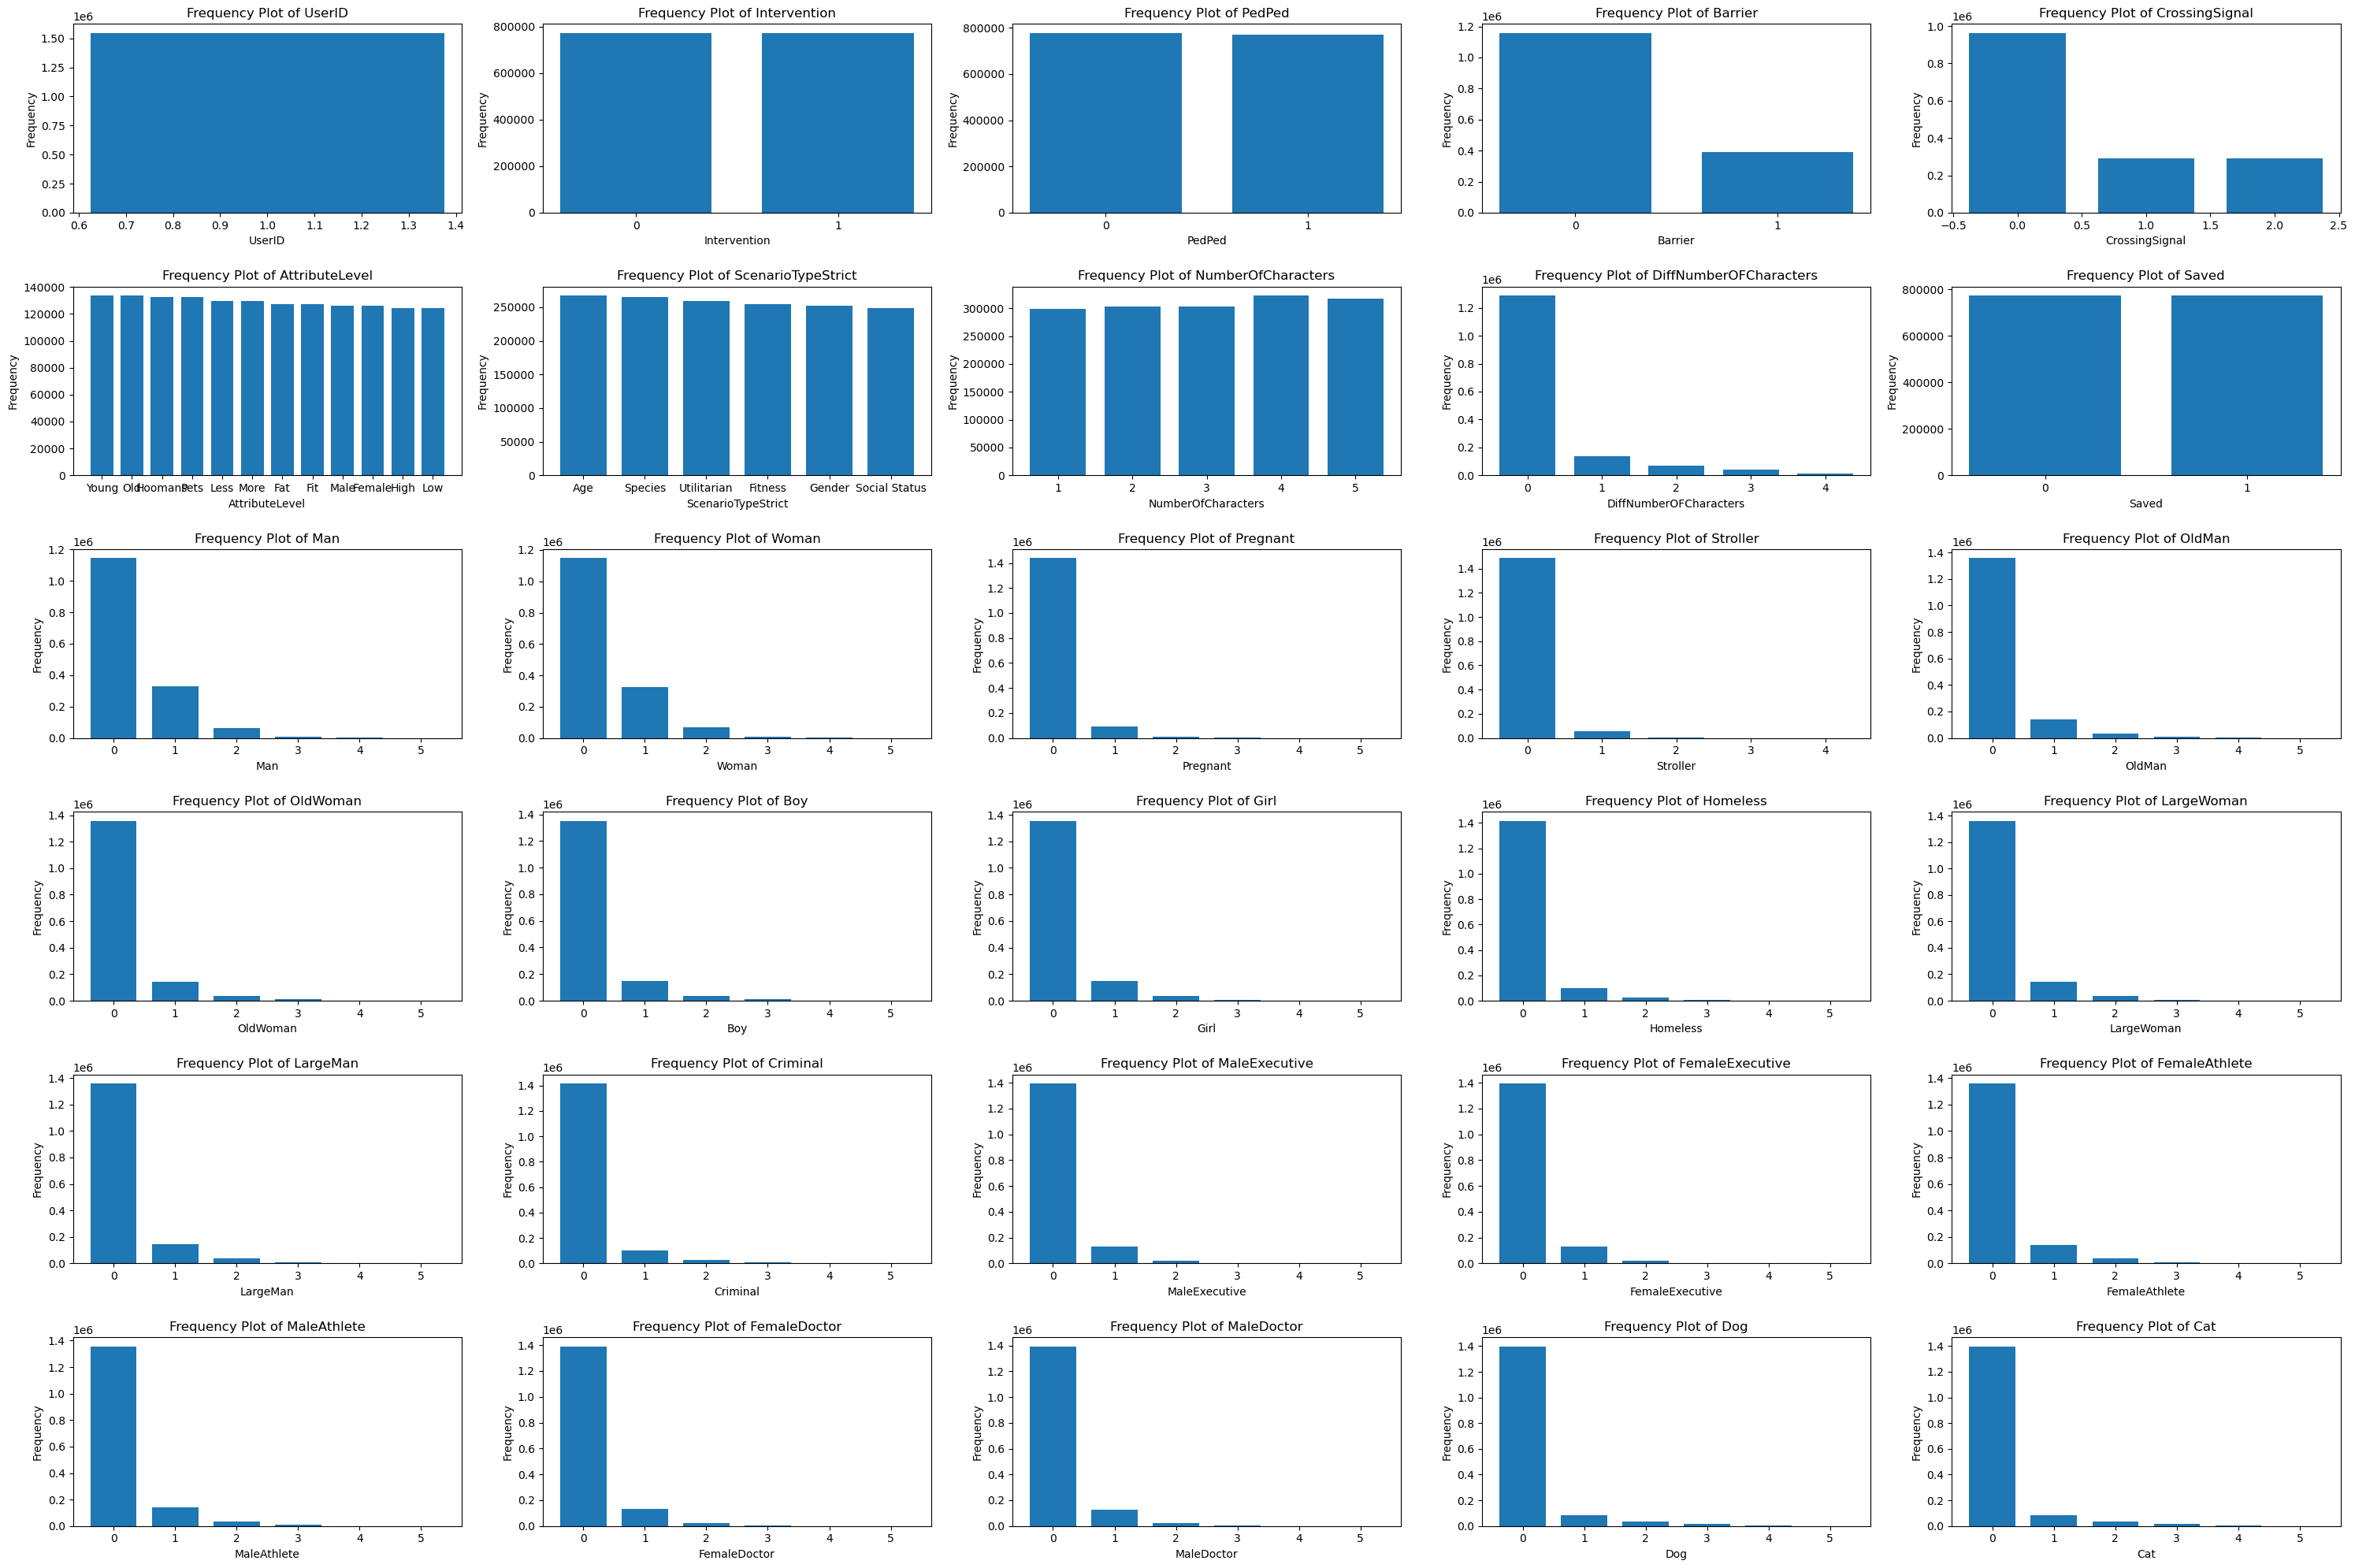

In [38]:
import pandas as pd
import matplotlib.pyplot as plt


# List of columns for which to plot the frequency plots
column_list = df_all_clean.columns.drop('ResponseID').tolist()

# Set up the figure and subplots (adjust the number of rows/columns depending on the number of plots)
fig, axes = plt.subplots(6, 5, figsize=(30, 20))  # 2 rows, 3 columns, adjust as needed
axes = axes.flatten()  # Flatten the axes array for easy iteration

# Loop through the columns and create subplots
for i, column in enumerate(column_list):
    # Count the occurrences of each category
    category_counts = df_all_clean[column].value_counts()

    # Create a bar plot in the corresponding subplot axis
    axes[i].bar(category_counts.index, category_counts.values, width=0.75)

    # Add labels and title for each subplot
    axes[i].set_xlabel(str(column))
    axes[i].set_ylabel('Frequency')
    axes[i].set_title(f"Frequency Plot of {column}")

    # If the plot has only 2 categories, adjust the x-ticks to show 0 and 1
    if len(category_counts.index) == 2:
        axes[i].set_xticks([0, 1])

# Automatically adjust the layout for better spacing
plt.tight_layout()

# Show the entire figure with all subplots
plt.show()

In [40]:
df_all_clean.to_csv('llm_dataset.csv', index=False)